<a href="https://colab.research.google.com/github/rodrigo-peixot/Projects/blob/main/Case_Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
# Importar libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv('/content/Startups+in+2021+end.csv')

df.shape

(936, 8)

In [96]:
# Primeiros registro
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [97]:
df.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [98]:
# Renomeando
df = df.rename(columns = {'Unnamed: 0': 'Id',
                      'Company': 'Empresa',
                     'Valuation ($B)': 'Valor ($)',
                     'Date Joined': 'Data de Adesão',
                     'Country': 'Pais',
                     'City': 'Cidade',
                     'Industry': 'Setor',
                     'Select Investors': 'Investidores'
                     })

In [99]:
# Verificar tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [100]:
df.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

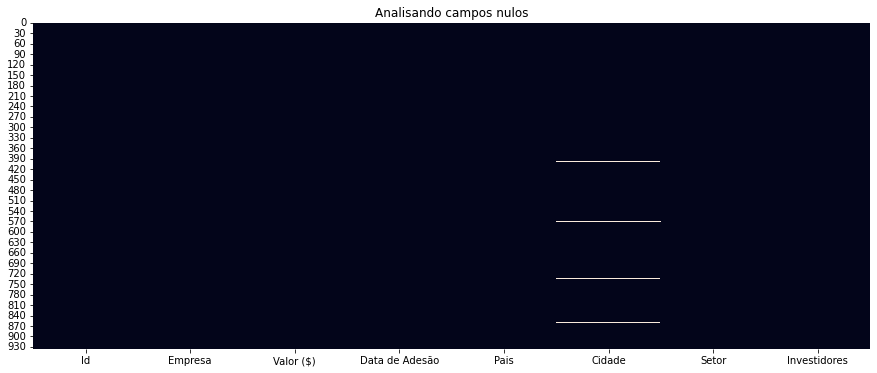

In [101]:
plt.figure( figsize=(15, 6))
plt.title('Analisando campos nulos')
sns.heatmap(df.isnull(), cbar=False);

In [102]:
# Campos Únicos na base de dados

df.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [103]:
df.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [104]:
df['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [105]:
#Valores Unicos - Ran1
df['Setor'].value_counts( normalize=True) # normalize nos dá porcentagens

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

In [106]:
df['Setor'].value_counts

<bound method IndexOpsMixin.value_counts of 0              Artificial intelligence
1                                Other
2                              Fintech
3                              Fintech
4         Internet software & services
                    ...               
931       Internet software & services
932            Artificial Intelligence
933        Data management & analytics
934                      Cybersecurity
935    E-commerce & direct-to-consumer
Name: Setor, Length: 936, dtype: object>

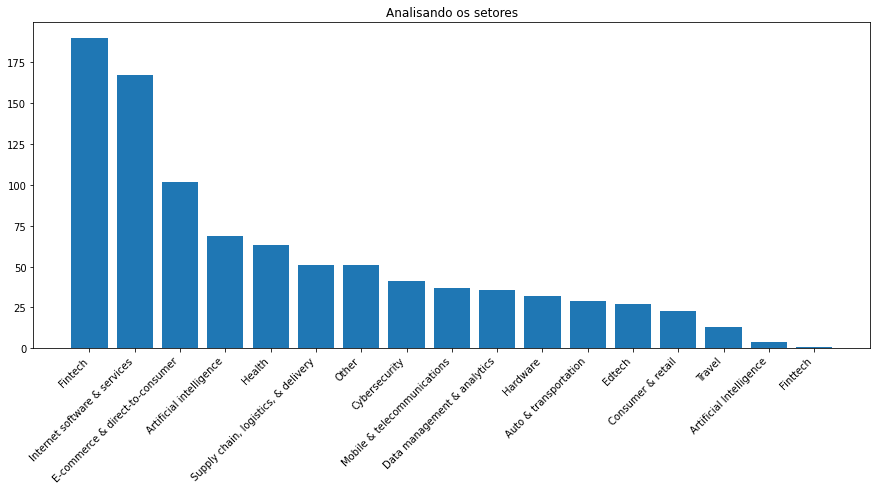

In [107]:
plt.figure( figsize=(15, 6))
plt.title('Analisando os setores')
plt.bar(df['Setor'].value_counts().index, df['Setor'].value_counts())
plt.xticks(rotation=45, ha='right');

In [108]:
analise = round(df['Pais'].value_counts( normalize=True) *100,1 )

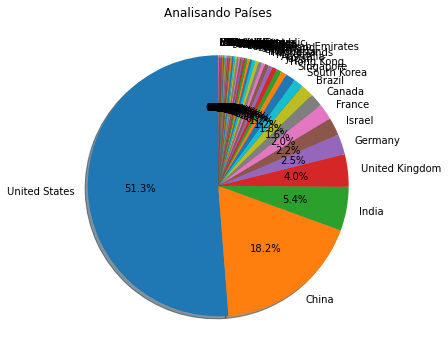

In [109]:
plt.figure( figsize=(15, 6))
plt.title('Analisando Países')
plt.pie(
    analise,
    labels = analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [110]:
analisepais = analise[0:10]
analisepais

United States     51.0
China             18.1
India              5.4
United Kingdom     4.0
Germany            2.5
Israel             2.2
France             2.0
Canada             1.6
Brazil             1.6
South Korea        1.2
Name: Pais, dtype: float64

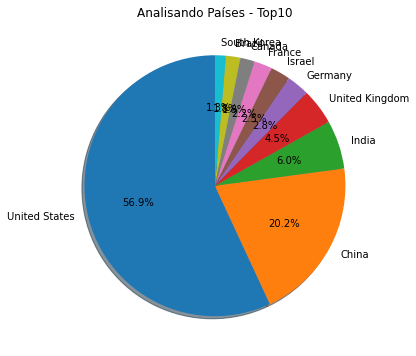

In [130]:
# Analise paises - top10
plt.figure( figsize=(15, 6))
plt.title('Analisando Países - Top10')
plt.pie(
    analisepais,
    labels = analisepais.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [112]:
df['Data de Adesão'] = pd.to_datetime(df['Data de Adesão'])

In [113]:
df.dtypes

Id                         int64
Empresa                   object
Valor ($)                 object
Data de Adesão    datetime64[ns]
Pais                      object
Cidade                    object
Setor                     object
Investidores              object
dtype: object

In [114]:
# Estrair o Ano e o Mes
df['Mes'] = pd.DatetimeIndex( df['Data de Adesão']).month
df['Ano'] = pd.DatetimeIndex( df['Data de Adesão']).year
# df['Dia'] = pd.DatetimeIndex( df['Data de Adesão']).day

df.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [115]:
# Tabela Analítica
analise_agrupada = df.groupby( by=['Pais', 'Ano', 'Mes', 'Empresa']).count()['Id'].reset_index()
analise_agrupada

,Pais,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [116]:
analise_agrupada.loc[analise_agrupada['Pais']=='Brazil']

,Pais,Ano,Mes,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [117]:
analise_agrupada.loc[analise_agrupada['Pais']=='United States']

,Pais,Ano,Mes,Empresa,Id
457,United States,2011,4,Vice Media,1
458,United States,2012,6,Fanatics,1
459,United States,2012,12,Avant,1
460,United States,2012,12,SpaceX,1
461,United States,2013,2,Mu Sigma,1
...,...,...,...,...,...
929,United States,2021,12,Iodine Software,1
930,United States,2021,12,Jokr,1
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1


In [119]:
df['Valor ($)'] = pd.to_numeric(df['Valor ($)'].apply( lambda Linha: Linha.replace('$', ''))) 

In [120]:
df.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [132]:
analise_pais = df.groupby( by=['Pais']).sum()['Valor ($)'].reset_index()

analise_valor = analise_pais.sort_values('Valor ($)', ascending=False)

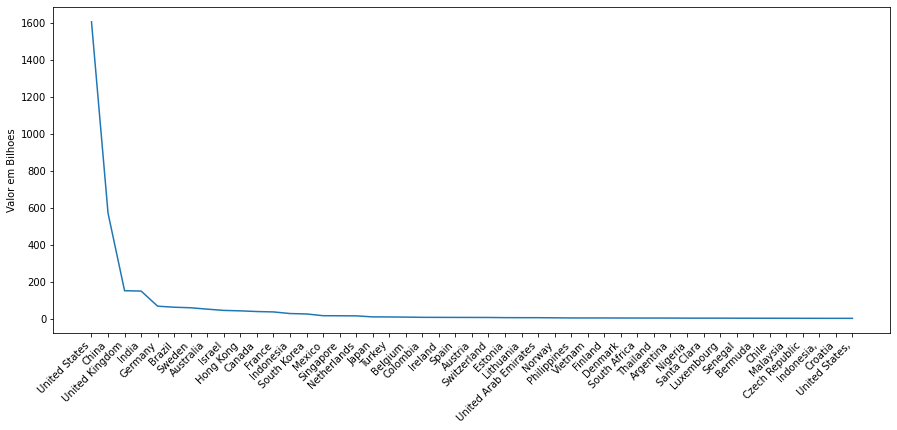

In [137]:
plt.figure( figsize=(15,6))
plt.ylabel('Valor em Bilhoes')
plt.plot(analise_valor[ 'Pais'], analise_valor[ 'Valor ($)'])
plt.xticks(rotation=45, ha='right');